<a href="https://colab.research.google.com/github/bytebuster21/AI-project/blob/main/configure_ImageDataGenerator_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully!
Creating dummy dataset...
Dummy dataset created at: /content/my_image_dataset

Setting up data generators...
Found 20 images belonging to 2 classes.
Found 6 images belonging to 2 classes.

Found 20 training images belonging to 2 classes.
Found 6 validation images belonging to 2 classes.

Class mapping (class_name -> integer_index):
{'cats': 0, 'dogs': 1}
Detected classes: ['cats', 'dogs']

Visualizing augmented training images:


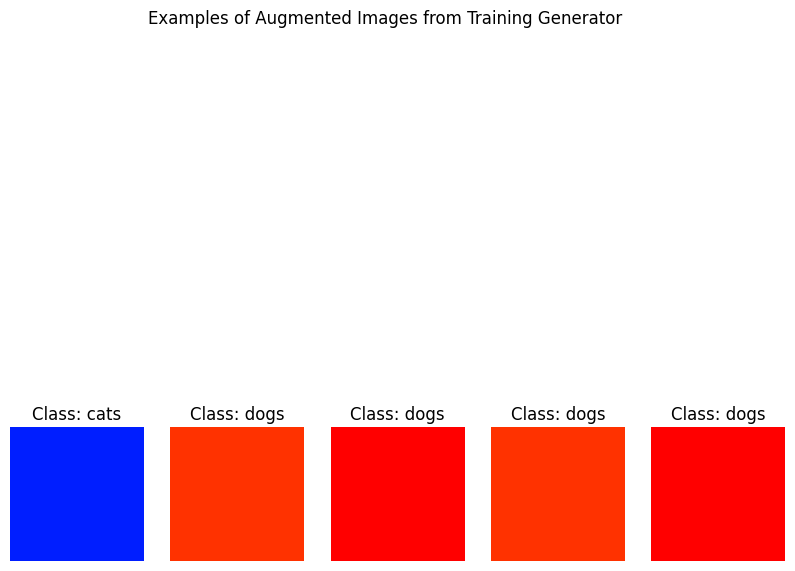


Visualizing validation images (not augmented):


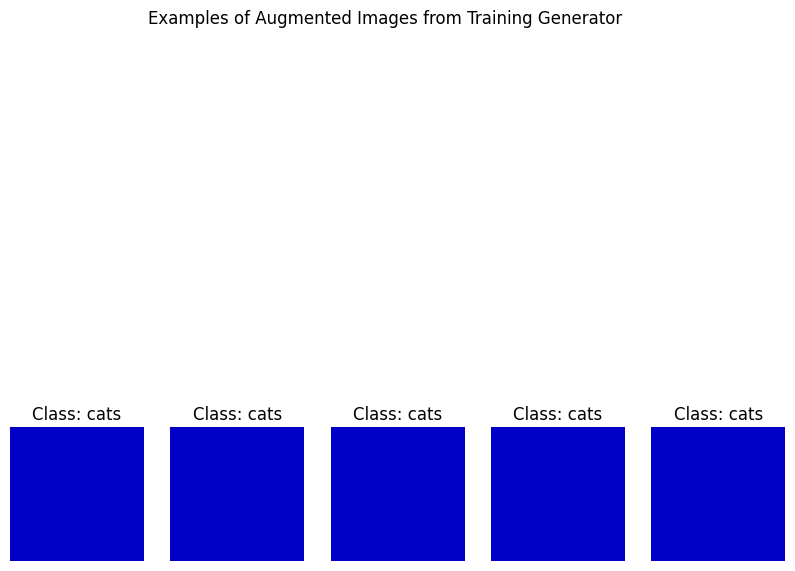

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,690 (72.61 MB)

 Trainable params: 19,034,690 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import shutil
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive mounted successfully!")



base_dir = '/content/my_image_dataset'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

os.makedirs(os.path.join(base_dir, 'train', 'dogs'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'train', 'cats'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'validation', 'dogs'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'validation', 'cats'), exist_ok=True)


from PIL import Image

def create_dummy_image(path, color, size=(100, 100)):
    img = Image.new('RGB', size, color=color)
    img.save(path)

# Generate dummy images for 'dogs' and 'cats'
print("Creating dummy dataset...")
for i in range(10): # 10 images per class for train
    create_dummy_image(os.path.join(base_dir, 'train', 'dogs', f'dog_{i:02d}.png'), (255, i*10, 0)) # Reddish
    create_dummy_image(os.path.join(base_dir, 'train', 'cats', f'cat_{i:02d}.png'), (0, i*10, 255)) # Bluish

for i in range(3): # 3 images per class for validation
    create_dummy_image(os.path.join(base_dir, 'validation', 'dogs', f'dog_val_{i:02d}.png'), (200, i*10, 0))
    create_dummy_image(os.path.join(base_dir, 'validation', 'cats', f'cat_val_{i:02d}.png'), (0, i*10, 200))
print("Dummy dataset created at:", base_dir)


IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Training Data Generator (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values from [0, 255] to [0, 1]
    rotation_range=20,          # Randomly rotate images by up to 20 degrees
    width_shift_range=0.1,      # Randomly shift images horizontally by up to 10%
    height_shift_range=0.1,     # Randomly shift images vertically by up to 10%
    shear_range=0.1,            # Apply shearing transformations
    zoom_range=0.1,             # Randomly zoom in on images
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest'         # Strategy for filling new pixels created by transformations
    # You can add more parameters here like brightness_range, vertical_flip, etc.
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print("\nSetting up data generators...")
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),      # Path to the training data directory
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # All images will be resized to this
    batch_size=BATCH_SIZE,
    class_mode='categorical'              # 'categorical' for one-hot encoded labels (multi-class)
                                          # 'binary' for 2-class classification
                                          # 'sparse' for integer labels
)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join(base_dir, 'validation'), # Path to the validation data directory
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False                         # Important: Do not shuffle validation data for consistent evaluation
)


print(f"\nFound {train_generator.samples} training images belonging to {train_generator.num_classes} classes.")
print(f"Found {validation_generator.samples} validation images belonging to {validation_generator.num_classes} classes.")

print("\nClass mapping (class_name -> integer_index):")
print(train_generator.class_indices)

# Get class names for easy reference
class_names = list(train_generator.class_indices.keys())
print("Detected classes:", class_names)

# --- 5. Visualize Augmented Images (Optional but recommended for understanding) ---

def plot_augmented_images(generator, num_images=5):
    """Plots a few images from a generator to visualize augmentation."""
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        # Get one batch of images and labels
        images, labels = next(generator) # `next()` gets the next batch
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[0]) # Display the first image from the batch
        # For categorical labels, find the class name
        predicted_class_index = np.argmax(labels[0])
        plt.title(f"Class: {class_names[predicted_class_index]}")
        plt.axis('off')
    plt.suptitle("Examples of Augmented Images from Training Generator")
    plt.show()

print("\nVisualizing augmented training images:")
plot_augmented_images(train_generator, num_images=5)

print("\nVisualizing validation images (not augmented):")
plot_augmented_images(validation_generator, num_images=5)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5), # Add dropout for regularization
    Dense(train_generator.num_classes, activation='softmax') # Output layer
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
